# IHLT Lab 1: Word Frequency Analysis

**Authors:** *Zachary Parent ([zachary.alexander.parent](mailto:zachary.alexander.parent@estudiantat.upc.edu)), Carlos Jiménez ([carlos.humberto.jimenez](mailto:carlos.humberto.jimenez@estudiantat.upc.edu))*

### 2024-09-13

**Instructions:** Develop a colab notebook that show the 25 non-stopwords with more number of occurrences in the file 'blake-poems.txt' of Gutenberg corpus.

In [1]:
import nltk
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('gutenberg')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zachparent/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/zachparent/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [2]:
# Get stop words
stop_words = stopwords.words('english')
pd.Series(stop_words).head(10)

0            i
1           me
2           my
3       myself
4           we
5          our
6         ours
7    ourselves
8          you
9       you're
dtype: object

In [3]:
# Get the gutenberg corpus
gutenberg = nltk.corpus.gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

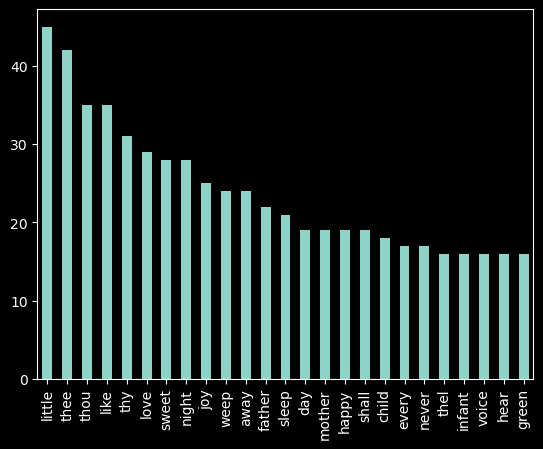

little    45
thee      42
thou      35
like      35
thy       31
love      29
sweet     28
night     28
joy       25
weep      24
away      24
father    22
sleep     21
day       19
mother    19
happy     19
shall     19
child     18
every     17
never     17
thel      16
infant    16
voice     16
hear      16
green     16
Name: count, dtype: int64

In [4]:
# Get the words from the blake-poems.txt file, filter to only alpha words,
# then make them lowercase, and remove stop words.
# Count the occurrences of each word and plot the 25 most common.
words = gutenberg.words('blake-poems.txt')
non_stop_words = [word.lower() for word in words if word.isalpha()]
non_stop_words = [word for word in non_stop_words if word not in stop_words]
words_series = pd.Series(non_stop_words).value_counts()
words_series.head(25).plot(kind='bar')
plt.show()
words_series.head(25)

## Stop words investigation

We noticed that among the top 25 most common words, there were a number of old english words that should be considered stop words but were not in the NLTK stop words list. We decided to add them to the list and re-run the analysis.

These words were:

```
thee
thou
thy
```

These words mean "you" (subject), "you" (object), and "your" (possessive) respectively, which are all stop words in modern english. We filtered these.

We noticed `thel`, but after some research, we learned it's a character in the text, so we decided to keep it.

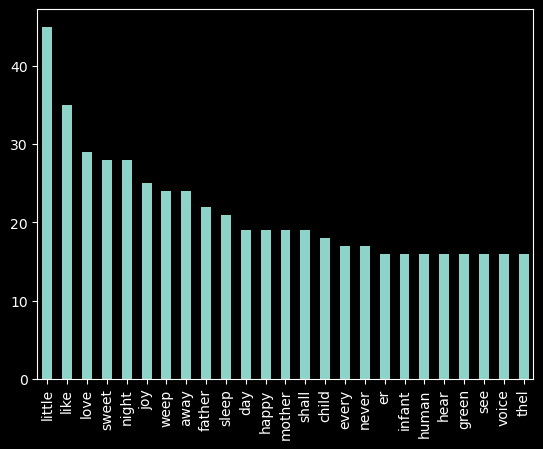

little    45
like      35
love      29
sweet     28
night     28
joy       25
weep      24
away      24
father    22
sleep     21
day       19
happy     19
mother    19
shall     19
child     18
every     17
never     17
er        16
infant    16
human     16
hear      16
green     16
see       16
voice     16
thel      16
Name: count, dtype: int64

In [5]:
# Filter out additional stop words, and re-run the analysis
stop_words.extend(['thou', 'thee', 'thy'])
non_stop_words = [word.lower() for word in words if word.isalpha()]
non_stop_words = [word for word in non_stop_words if word not in stop_words]
words_series = pd.Series(non_stop_words).value_counts()
words_series.head(25).plot(kind='bar')
plt.show()
words_series.head(25)

## Dealing with "er"

We didn't know what "er" meant, so we decided to look for instances with context in the text.

It seems that this often occurs after `o` and `'` in the text. It also occurs after `whate`. This made us think it was typically used as a shortening of 'ver', e.g. to mean 'over', 'whatever', 'wherever', or 'never'.

We decided to filter it out.

### Future work

We could use a different preprocessing approach to identify and preserve these contractions, showing their original meaning.

In [6]:
# Find all instances of "er" in the text, and print the surrounding 10 words.
er_idxs = [i for i, word in enumerate(words) if word == 'er']
for er_idx in er_idxs:
    print(' '.join(words[er_idx - 10:er_idx + 10]))

and bid thee feed By the stream and o ' er the mead ; Gave thee clothing of delight ,
A SONG Sweet dreams , form a shade O ' er my lovely infant ' s head ! Sweet dreams
crown Sweet Sleep , angel mild , Hover o ' er my happy child ! Sweet smiles , in the
Sleep , sleep , happy sleep , While o ' er thee doth mother weep . Sweet babe , in
shine like the gold , As I guard o ' er the fold ." SPRING Sound the flute ! Now
DREAM Once a dream did weave a shade O ' er my angel - guarded bed , That an emmet
: It is eternal winter there . For where ' er the sun does shine , And where ' er
' er the sun does shine , And where ' er the rain does fall , Babes should never hunger
weep . " Frowning , frowning night , O ' er this desert bright Let thy moon arise , While
the virgin viewed : Then he gambolled round O ' er the hallowed ground . Leopards , tigers , play
by an Angel mild : Witless woe was ne ' er beguiled ! And I wept both night and day
tree ," And I passed the sweet flower o ' er . Then I wen

## Final list of 25 most common non-stopwords in Gutenberg Blake poems

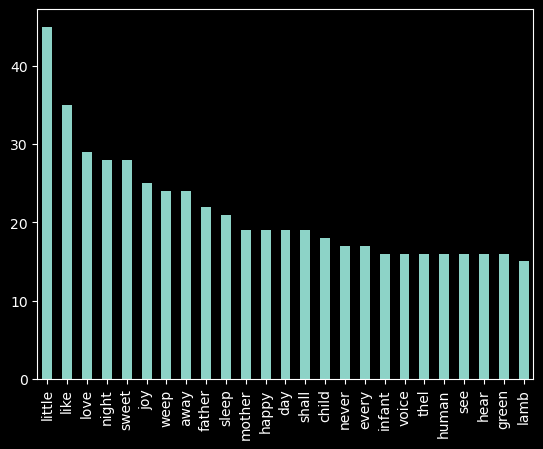

little    45
like      35
love      29
night     28
sweet     28
joy       25
weep      24
away      24
father    22
sleep     21
mother    19
happy     19
day       19
shall     19
child     18
never     17
every     17
infant    16
voice     16
thel      16
human     16
see       16
hear      16
green     16
lamb      15
Name: count, dtype: int64

In [7]:
# Filter out "er" and re-run the analysis.
stop_words.extend(['thou', 'thee', 'thy', 'er'])
non_stop_words = [word.lower() for word in words if word.isalpha()]
non_stop_words = [word for word in non_stop_words if word not in stop_words]
words_series = pd.Series(non_stop_words).value_counts()
words_series.head(25).plot(kind='bar')
plt.show()
words_series.head(25)